In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.3 MB/s eta 0:00:00


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [ ]:
from datasets import load_dataset
data=load_dataset('conll2003')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/12.3k [00:00<?, ?B/s]

conll2003.py:   0%|          | 0.00/9.57k [00:00<?, ?B/s]

The repository for conll2003 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conll2003.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [ ]:
import numpy as np
#import gradio as gr
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from tqdm.notebook import tqdm
import random
from string import punctuation
import nltk
nltk.download('punkt') ## for tokenization
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
SW=set(stopwords.words("english"))
pn=list(punctuation)
D=6

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


extract features, labels and words from data

In [ ]:
def extract(data):
  words=[]
  features=[]
  labels=[]
  for d in tqdm(data):
    token=d["tokens"]
    nertags=d["ner_tags"]
    l=len(token)
    for i in range(l):
      x=vectorize(token[i], i/l)
      if nertags[i]>0:
        y=1;
      else: y=0
      features.append(x)
      labels.append(y)
      words.append(token[i])

  ## coverting lists to numpy arrays
  words=np.asarray(words,dtype=("object")) ## indicates it hold python objects
  features=np.asarray(features,dtype=np.float32)
  labels=np.asarray(labels,dtype=np.float32)
  return words,features,labels


below function extract features for a word returns feature vector
features we are using:  
1.title  
2.punctuation   
3.stopwords  
4.lower or uppercase

In [ ]:
def vectorize(w,scale):
  v=np.zeros(D).astype(np.float32)
  if w[0].isupper():
    title=1
  else :title=0
  if w.isupper():
    allcap=1
  else: allcap=0
  if w in pn:
    punc=1
  else :punc=0
  if w in SW:
    stop=1
  else: stop=0
  v[0]=title
  v[1]=punc
  v[2]=stop
  v[3]=allcap
  v[4]=scale
  v[5]=len(w) ## length of word
  return v



In [ ]:
def predict(model,scale,sent):
  tokens=word_tokenize(sent)
  l=len(tokens)
  features=[]
  for i in range(l):
    x=vectorize(tokens[i], i/l)
    features.append(x)
  features=np.asarray(features,dtype=np.float32)
  scaled=scale.transform(features)
  y_pred=model.predict(scaled)
  return tokens,y_pred

data contains id,tokens,pos_tags,chunk_tags.ner_tags

id- it just serial number of sentence

token- word of sentence

pos_tags- pos tags of tokens, these pos tags assigned as number

chunk tags - Chunk tags indicate phrases or "chunks" in the sentence, like noun phrases or verb phrases.
These tags help break down sentences into subcomponents, which can be useful in understanding the grammatical structure.

ner_tags- indicates a number if it noun entity ot not .        
 if it not noun it have 0 value if it is a noun any number >0(they classified based IOB(inside outside beginning RULE)
0: O (not an entity)
1: B-PER (beginning  person)
2: I-PER (inside  person)
3: B-LOC (beginning  location)
4: I-LOC (inside  location)
5: B-ORG (beginning  an organization)
6: I-ORG (inside  organization)
7: B-MISC (beginning  a miscellaneous entity)
8: I-MISC (inside a miscellaneous entity)

In [ ]:
train_data=data['train']
test_data=data['test']
val_data=data['validation']
print(train_data)
for i in range(15):
  print(train_data[i])

Dataset({
    features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
    num_rows: 14041
})
{'id': '0', 'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7], 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0], 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}
{'id': '1', 'tokens': ['Peter', 'Blackburn'], 'pos_tags': [22, 22], 'chunk_tags': [11, 12], 'ner_tags': [1, 2]}
{'id': '2', 'tokens': ['BRUSSELS', '1996-08-22'], 'pos_tags': [22, 11], 'chunk_tags': [11, 12], 'ner_tags': [5, 0]}
{'id': '3', 'tokens': ['The', 'European', 'Commission', 'said', 'on', 'Thursday', 'it', 'disagreed', 'with', 'German', 'advice', 'to', 'consumers', 'to', 'shun', 'British', 'lamb', 'until', 'scientists', 'determine', 'whether', 'mad', 'cow', 'disease', 'can', 'be', 'transmitted', 'to', 'sheep', '.'], 'pos_tags': [12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 35, 24, 35, 37, 16, 21, 15, 24, 41, 15, 16, 21, 21, 20, 37, 40, 35, 2

In [ ]:
words_train,X_train,Y_train=extract(train_data)
words_test,X_test,Y_test=extract(test_data)
words_val,X_val,Y_val=extract(val_data)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

  0%|          | 0/14041 [00:00<?, ?it/s]

  0%|          | 0/3453 [00:00<?, ?it/s]

  0%|          | 0/3250 [00:00<?, ?it/s]

(203621, 6)
(46435, 6)
(51362, 6)


In [ ]:
print(X_train[0])

[1. 0. 0. 1. 0. 2.]


In [ ]:
nes=words_val[Y_val==1]
for i in np.random.choice(nes,size=10):
  print(i)

House
Rosati
Henke
Bank
Worcestershire
United
NATO
Anton
Samsung
McNeil


In [ ]:

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_val=sc.transform(X_val)
print(X_train[0])

[ 1.8799149  -0.37757722 -0.5704449   4.868192   -1.6073414  -0.84740716]


In [ ]:
svm=SVC(kernel="linear",C=1,class_weight="balanced", random_state=24)
svm.fit(X_train,Y_train)
# Weight vector (w) - Coefficients of the hyperplane
weights = svm.coef_

# Bias term (b) - Intercept
bias = svm.intercept_

print("Weights (w):", weights)
print("Bias (b):", bias)


Weights (w): [[ 2.01007926e+00  5.97631329e-03  4.29983771e-03 -2.35517981e-03
   1.86218863e-03  4.49499094e-04]]
Bias (b): [-1.00897296]


In [ ]:
y_pred_val=svm.predict(X_val)
y_pred_test=svm.predict(X_test)
c=np.sum(Y_val==y_pred_val)
print(c*100/len(Y_val))
g=np.sum(Y_test==y_pred_test)
print(g*100/len(Y_test))

94.00334877925314
93.35630451168299


In [ ]:
y_combined_true = np.concatenate([Y_val, Y_test])
y_combined_pred = np.concatenate([y_pred_val, y_pred_test])
# Generate a single classification report
print("Combined Classification Report:")
print(classification_report(y_combined_true, y_combined_pred))
print(confusion_matrix(y_combined_true, y_combined_pred))

Combined Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     81082
         1.0       0.74      0.98      0.84     16715

    accuracy                           0.94     97797
   macro avg       0.87      0.95      0.90     97797
weighted avg       0.95      0.94      0.94     97797

[[75266  5816]
 [  349 16366]]


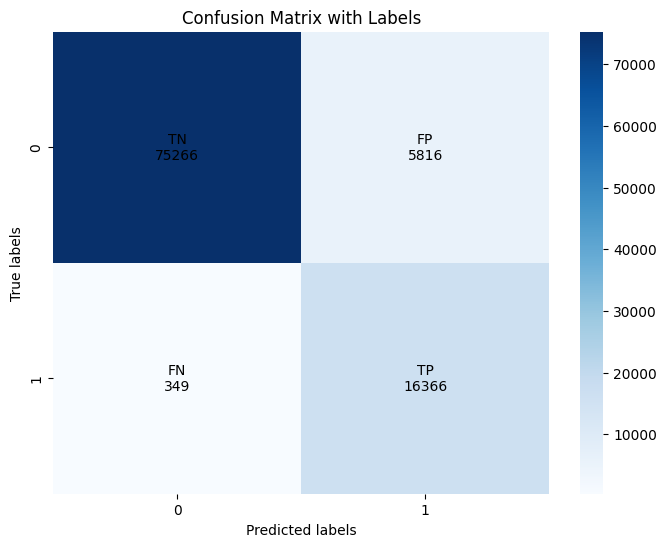

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sample true and predicted labels
y_combined_true = np.concatenate([Y_val, Y_test])
y_combined_pred = np.concatenate([y_pred_val, y_pred_test])

# Create confusion matrix
cm = confusion_matrix(y_combined_true, y_combined_pred)

# Define labels
##labels = ['Class 0', 'Class 1']  # Replace with your class names

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')

# Annotate the confusion matrix with TP, TN, FP, FN
for i in range(len(cm)):
    for j in range(len(cm)):
        text = ""
        if i == 0 and j == 0:  # True Negative
            text = f'TN\n{cm[i, j]}'
        elif i == 1 and j == 1:  # True Positive
            text = f'TP\n{cm[i, j]}'
        elif i == 0 and j == 1:  # False Positive
            text = f'FP\n{cm[i, j]}'
        elif i == 1 and j == 0:  # False Negative
            text = f'FN\n{cm[i, j]}'
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Labels')
plt.show()


In [ ]:
def gradio_predict(sentence):
    tokens, y_pred = predict(svm, sc, sentence)
    # Combine each token with its corresponding label
    output = " ".join([f"{token}_{label}" for token, label in zip(tokens, y_pred)])
    ###print(output)
    return output
#sent=" Washington DC is the capital of United States of America";
#gradio_predict(sent)
interface = gr.Interface(
    fn=gradio_predict,
    inputs="text",
    outputs="text",
    title="NEI WITH SVM",
    description="Enter the sentence"
)
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4c998a1d76d16f876a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
